# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### 1. Ensure clean data

In [2]:
# Your code to explore data and train a regression model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [3]:
# get year
data['year'] = data['transaction_date'].astype(int)

In [4]:
label = 'price_per_unit'
numerical_features = list(data.columns[1:-2])

In [5]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,year
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000


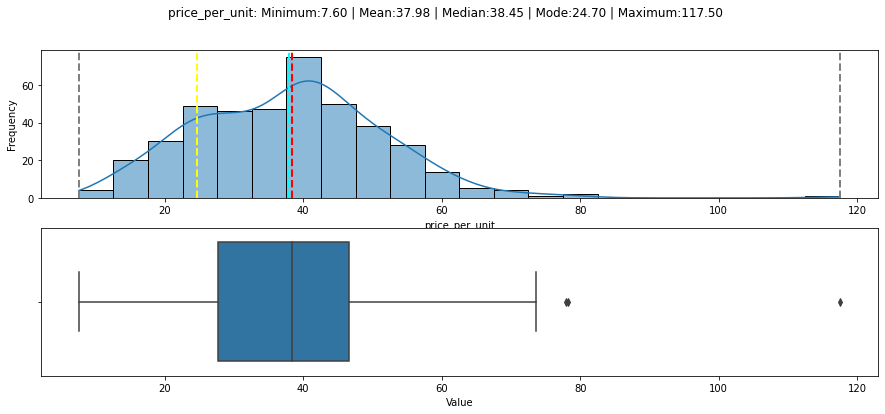

In [6]:
%matplotlib inline
from scripts import plots

plots.show_distribution(data[label])

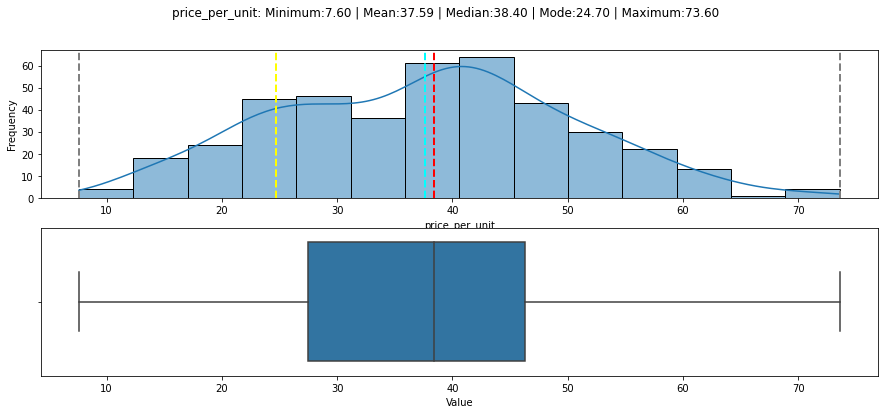

In [7]:
# Let's get rid of the few outliers it's easy to see the without using quantile method
data = data[data[label] < 75]
plots.show_distribution(data[label])


### Explore the data

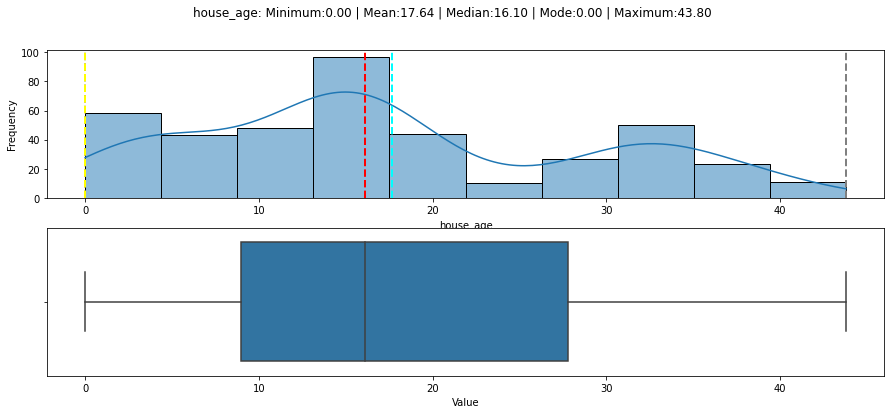

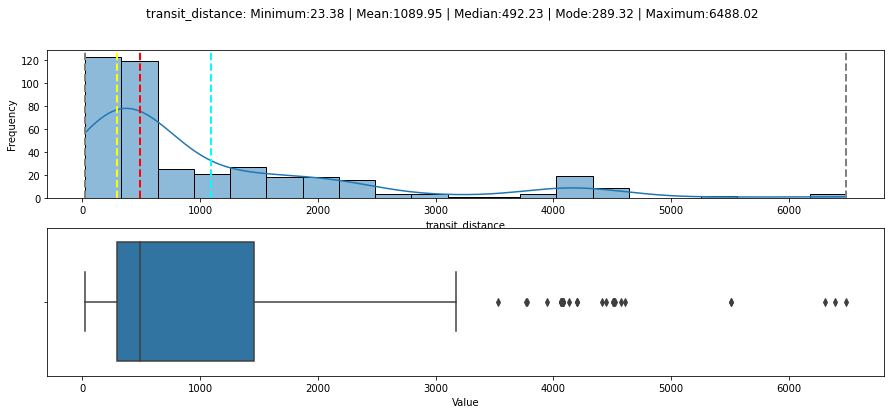

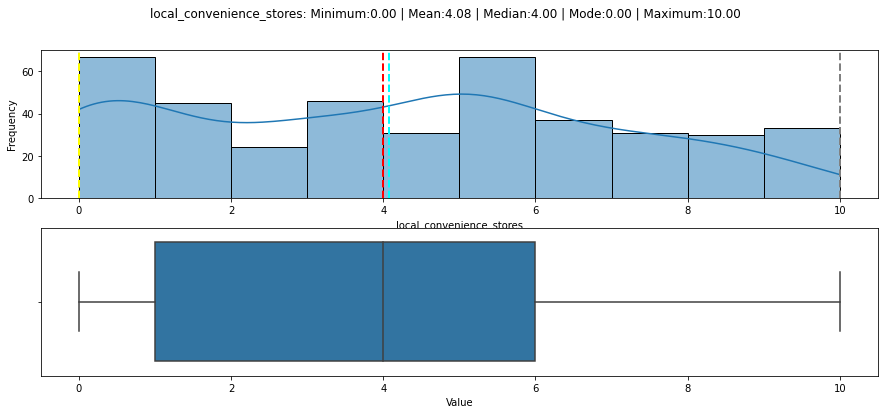

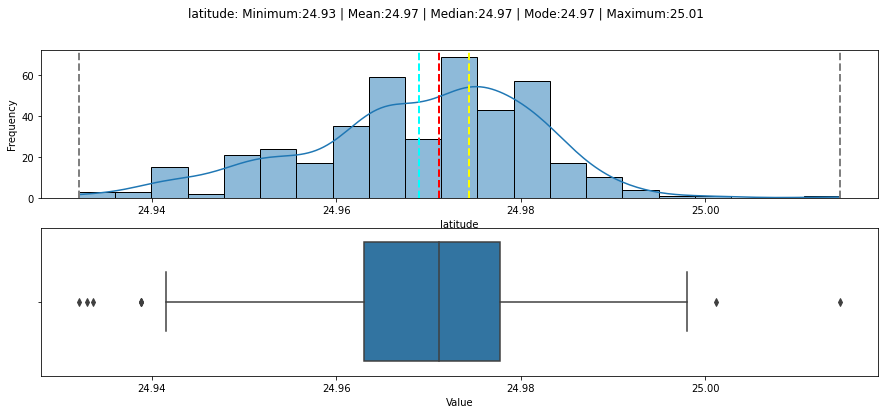

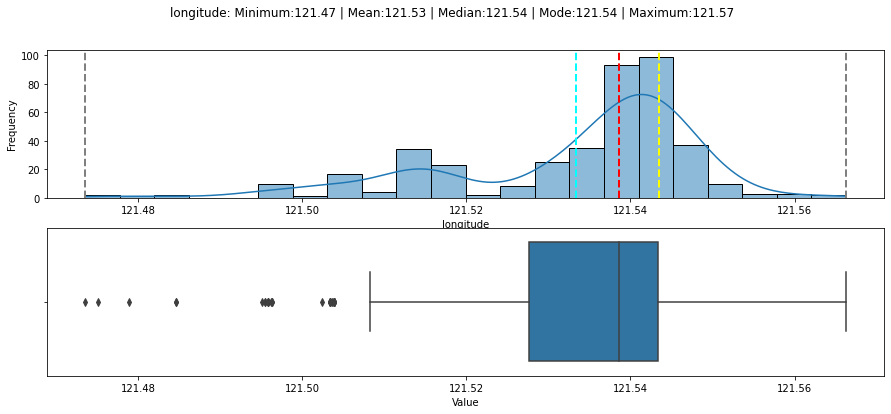

In [8]:
for feature in numerical_features:
    plots.show_distribution(data[feature])

<AxesSubplot: >

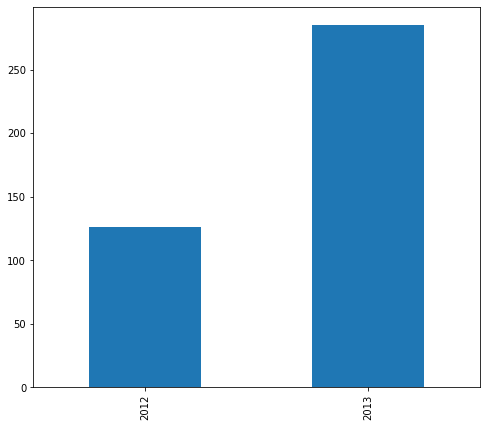

In [9]:
data['year'].value_counts().sort_index().plot(kind='bar', figsize=(8,7))

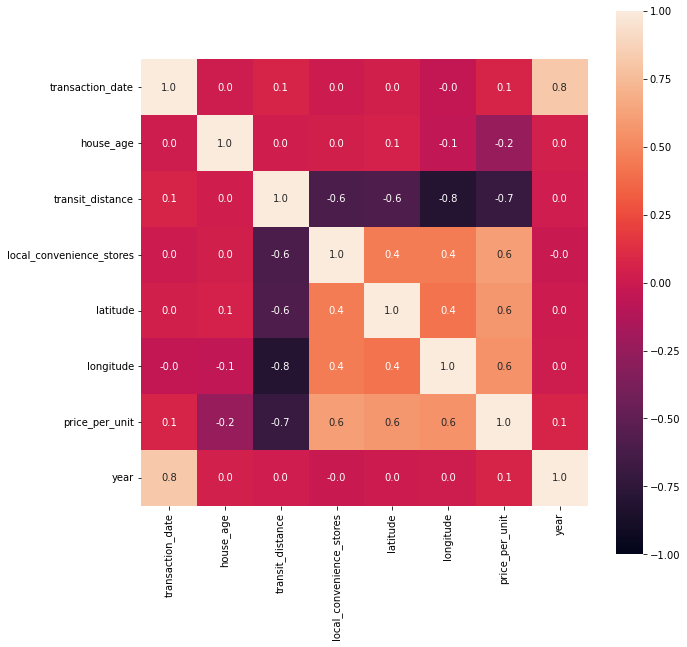

In [10]:
# see how the correlation of data

plots.show_corr_matrix(data)

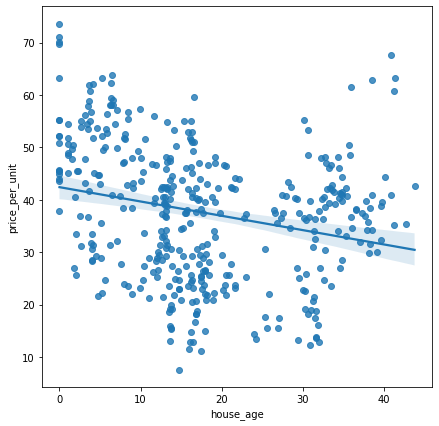

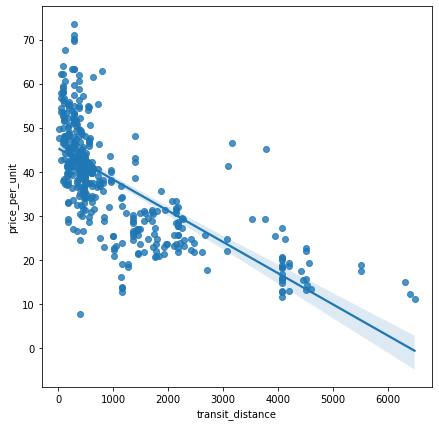

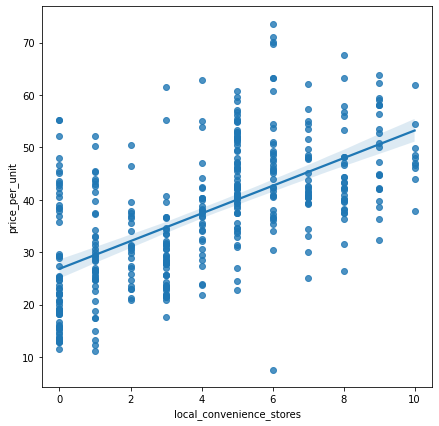

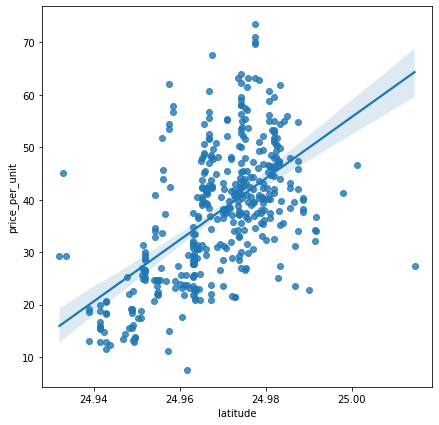

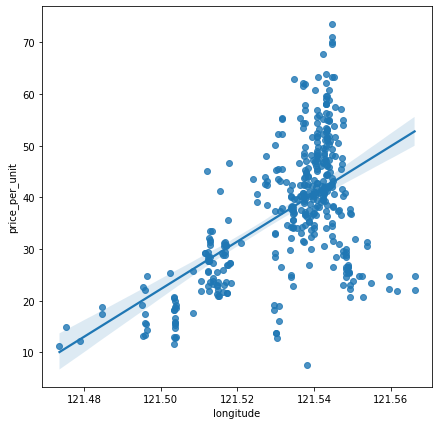

In [11]:
for feature in numerical_features:
    plots.show_correlation(data[[label, feature]])

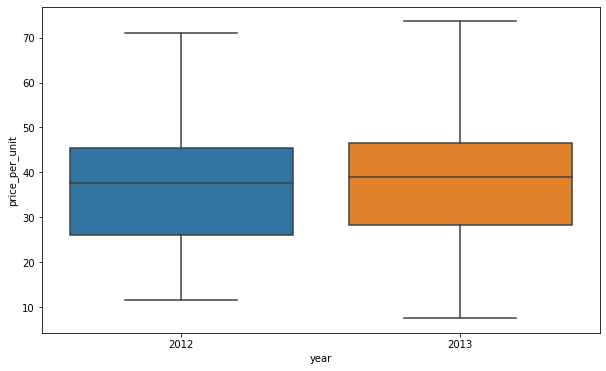

In [12]:
plots.show_box(data[[label, 'year']])

### Train the model

In [13]:
# separate the feature and the label

features = numerical_features + ['year']
X, y = data[features].values, data[label].values

print(f"Features: {X.shape[1]} columns and {X.shape[0]} rows\nLabels: {y.shape[0]} values")

Features: 6 columns and 411 rows
Labels: 411 values


In [14]:
# split the data into the mamain and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(f"Training set: {X_train.shape[0]} rows \nTest set: {X_test.shape[0]} ")

Training set: 287 rows 
Test set: 124 


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [16]:
# evaluate the model
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print(f"Prediction:\t\t{np.round(predictions)[:10]}\nActual labels:\t\t{np.round(y_test[:10])}")

Prediction:		[16. 36. 36. 53. 31. 46. 42. 34. 34. 34.]
Actual labels:		[17. 37. 31. 45. 23. 46. 45. 41. 29. 40.]


In [17]:
type(predictions)

numpy.ndarray

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(predictions:np.ndarray, y_test:np.ndarray):
    result_df = pd.DataFrame({'predictions': predictions, 'actual_labels': y_test})
    plots.show_correlation(result_df)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"Mean Square Error: {mse}\nRoot Mean Square Error: {rmse}\nR-squared: {r2}")

Mean Square Error: 54.08142017427524
Root Mean Square Error: 7.354007082827378
R-squared: 0.6174631335623586


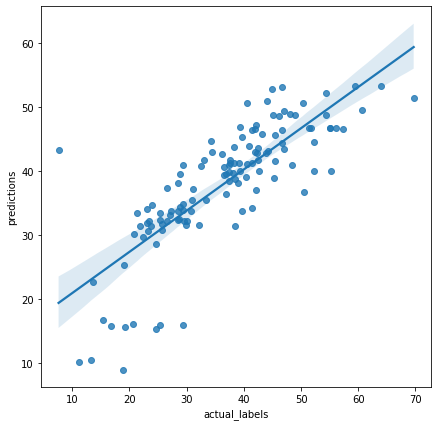

In [19]:
evaluate_model(predictions, y_test)

## Experimenting

1. different regression models

Mean Square Error: 59.861863774813344
Root Mean Square Error: 7.737044899366511
R-squared: 0.5765760271505123


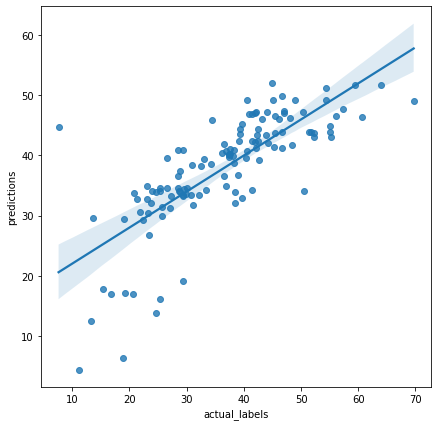

In [20]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

Mean Square Error: 59.803255100744884
Root Mean Square Error: 7.733256435729057
R-squared: 0.5769905868727231


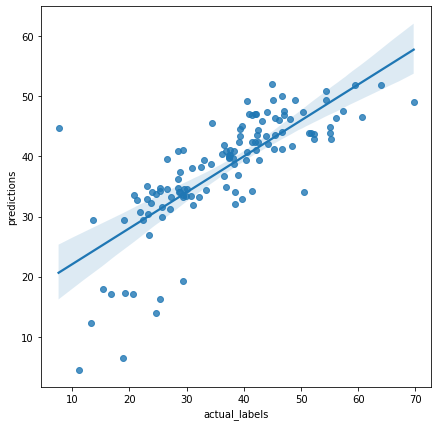

In [21]:
from sklearn.linear_model import ElasticNet

model = ElasticNet().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

2. Decision Trees

Mean Square Error: 42.407580645161296
Root Mean Square Error: 6.512110306587358
R-squared: 0.7000362978463708


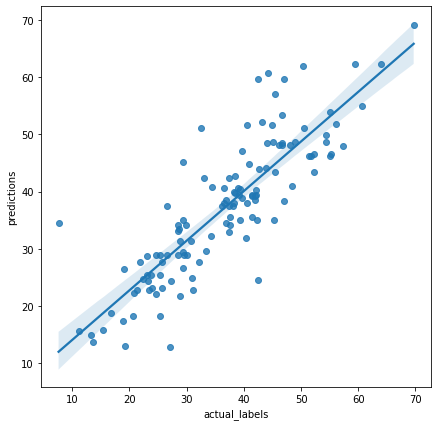

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

3. Ensemble Algorythms

Mean Square Error: 30.31531611681729
Root Mean Square Error: 5.5059346270017855
R-squared: 0.7855691290091158


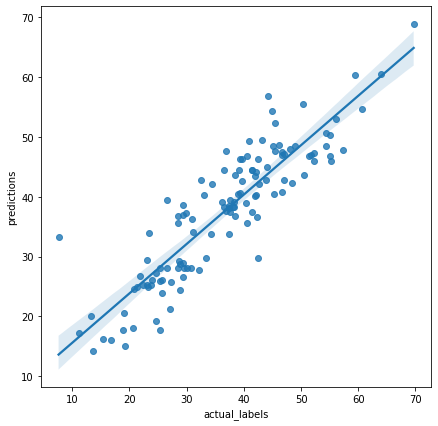

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

Mean Square Error: 32.75927056451614
Root Mean Square Error: 5.72357148680054
R-squared: 0.7682821814192343


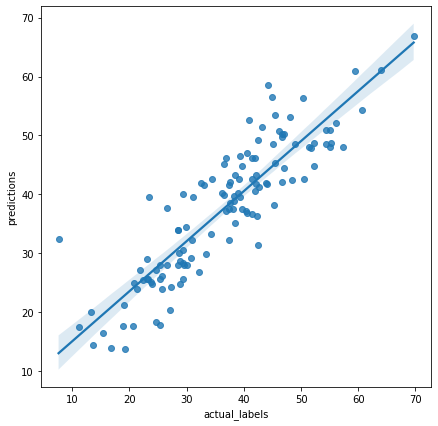

In [24]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

Mean Square Error: 29.855439107056345
Root Mean Square Error: 5.464013095432362
R-squared: 0.7888220005071972


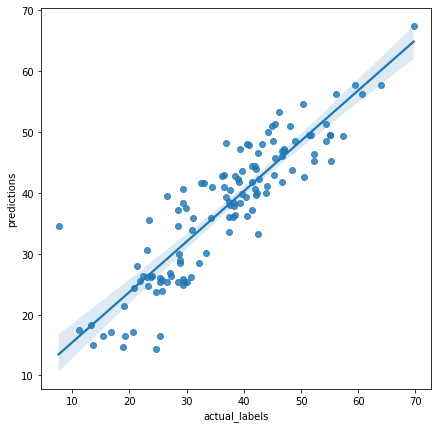

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

## Tuning hyperparameters

Best paarameters:	{'learning_rate': 0.1, 'n_estimators': 50}

Mean Square Error: 29.80636330635058
Root Mean Square Error: 5.459520428238233
R-squared: 0.7891691308702573


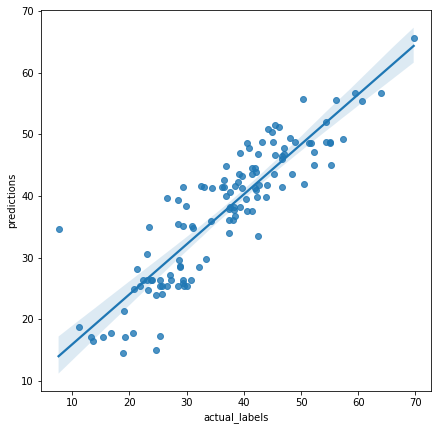

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150],
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

print(f"Best paarameters:\t{gridsearch.best_params_}\n")

model = gridsearch.best_estimator_

predictions = model.predict(X_test)
evaluate_model(predictions, y_test)

## Organize a pipeline

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4]),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [5])]), 'regressor': Lasso()}
Mean Square Error: 55.81745167253192
Root Mean Square Error: 7.471107794198389
R-squared: 0.6051835734613085
{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4]),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [5])]), 'regressor': DecisionTr

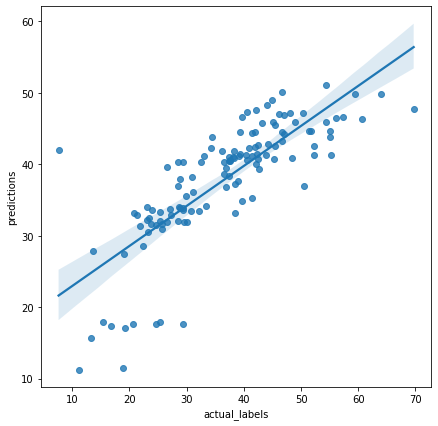

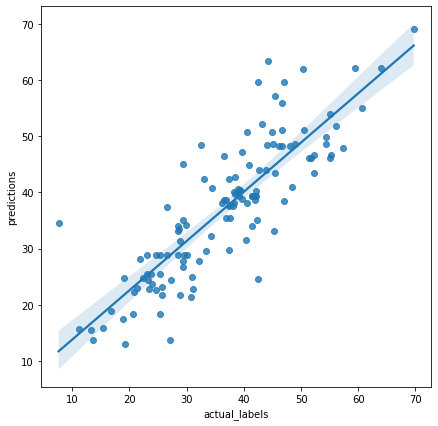

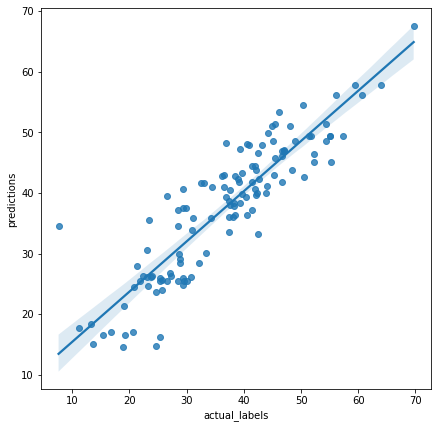

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [0,1,2,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = [5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

algorithms = [Lasso(), DecisionTreeRegressor(), GradientBoostingRegressor()]

for alg in algorithms:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', alg)
    ])
    model = pipeline.fit(X_train, (y_train))
    print(model.named_steps)
    predictions = model.predict(X_test)
    evaluate_model(predictions, y_test)

In [31]:
# pick the best model

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model = pipeline.fit(X_train, y_train)

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [32]:
# Your code to use the trained model
import joblib
import os

# Save the model as a pickle file
directory = 'models'

try:
    os.mkdir(directory)
except FileExistsError as err:
    print(err)
    pass

file_name = 'real_estate.pkl'

path = os.path.join(directory,file_name)

joblib.dump(model, path)

['models\\real_estate.pkl']

In [36]:
loaded_model = joblib.load(path)

X_new = np.array([
    [16.2, 289.3248, 5, 24.98203, 121.54348, 2013],
    [13.6, 4082.015, 0, 24.94155, 121.50381, 2013],
    ]).astype('float64')

result = loaded_model.predict(X_new)

print(f"Predictions:")
for prediction in result:
    print(prediction)

Predictions:
49.45214200017349
16.496320174102795
